## 44 Things To Add To Your Thrill-Seeking Bucket List
## by Travel Insider
https://www.facebook.com/watch/?v=432715034163345

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from geopy.geocoders import Nominatim
from bidi import algorithm as bidi
from tqdm import tqdm, trange

In [2]:
df = pd.read_excel(r'Extreme TDL.xlsx', skiprows=2)[:44]
# (nrows argument is apparently still not supported in this pandas version)
# (can't use dtype directly due to an open issue in pandas)
for k, v in {'id':int,'coolness':int,'detailed_location':str}.items():
    df[k] = df[k].astype(v)
df

,id,coolness,location,detailed_location,attraction
0,1,0,Denmark,"Tivoli, Aarhus (not copenhagen)",free fall from skytower
1,2,2,Ohio,nan,מגלשת מים עם קפיצה
2,3,2,Wales,nan,fast omega
3,4,0,Toronto,nan,hanging above high tower
4,5,2,France,nan,hanging bikes
5,6,1,California,nan,steep rollercoaster
6,7,1,Ecuador,nan,huge swing in canyon
7,8,2,Utah,nan,אבוב תלול
8,9,2,India,nan,80 degrees climb
9,10,2,Japan,nan,pedal coaster with no rails


In [3]:
c = df.groupby('location').coolness.sum()
txt = df.groupby('location').attraction.apply(lambda labs: '\n  '.join(labs))
print(c)

location
Amsterdam          1
Atlanta            2
California         3
Canada             2
Chicago            1
China              2
Colombia           1
Denmark            0
Dubai              3
Ecuador            2
Florida            2
France             2
Greece             1
Hawaii             1
India              2
Indonesia          2
Jamaica            2
Japan              5
Las Vegas          5
New Zealand        0
Ohio               4
Philipines         1
Russia             0
Sao Paulo          2
Shanghai           1
South Korea        0
Switzerland        2
Taiwan             0
Thailand           2
Toronto            0
Utah               2
Wales              2
multiple cities    2
unclear            0
Name: coolness, dtype: int32


100%|██████████████████████████████████████████████████████████████████████████████████| 34/34 [00:12<00:00,  2.59it/s]


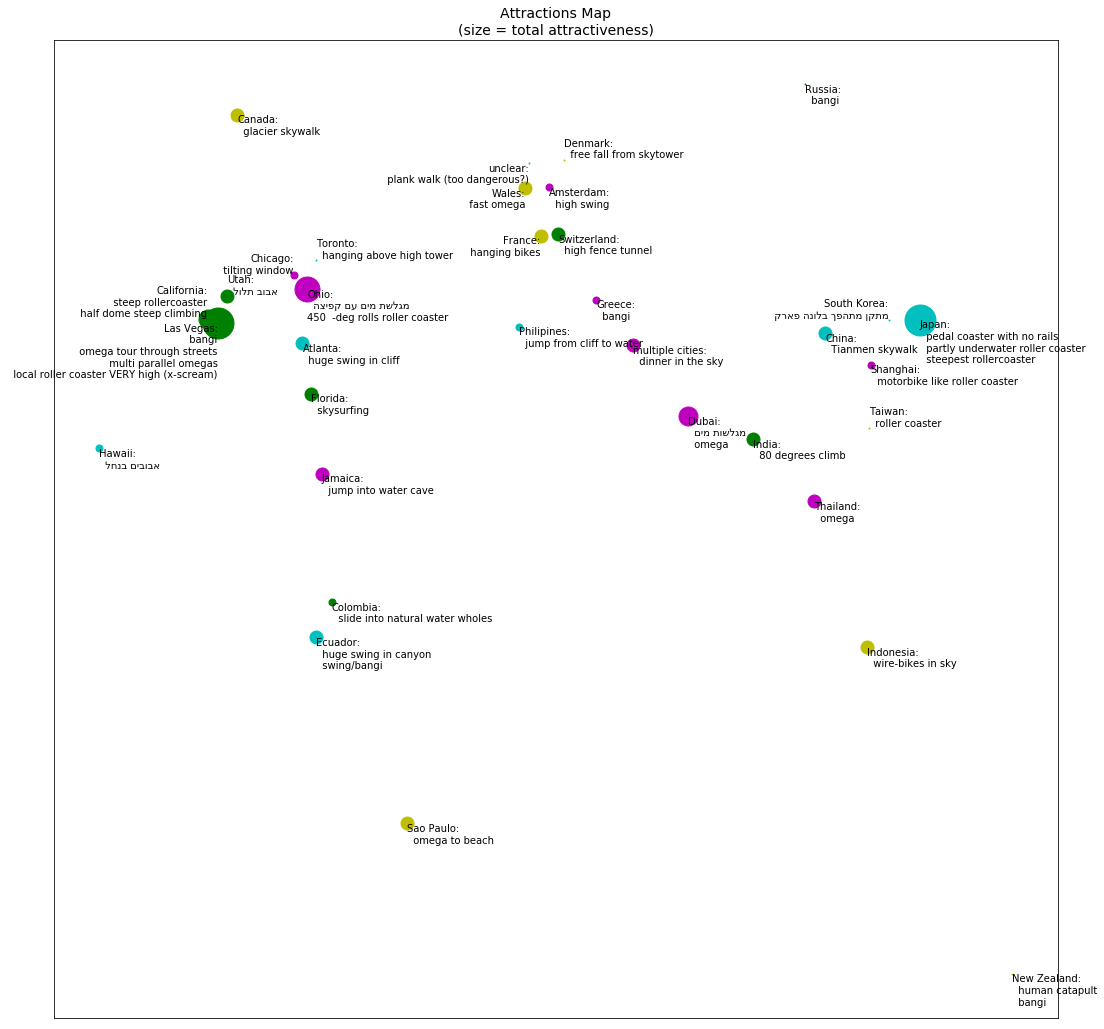

In [5]:
geolocator = Nominatim(user_agent="my-application")
fig = plt.figure(figsize=(18, 18))
right_align = ('California','South Korea','Wales','unclear','France','Chicago','Las Vegas')
bottom_align = ('Utah','Toronto','Chicago','California','South Korea','Denmark','Taiwan')
colors = ('m','c','g','y')
for i,loc in enumerate(tqdm(c.keys())):
    g = geolocator.geocode(loc)
    plt.plot(g.longitude, g.latitude, colors[i%4]+'o', markersize=1+6*c[loc])
    plt.annotate(bidi.get_display(loc+':\n  '+txt[loc]), (g.longitude, g.latitude),
                 horizontalalignment='right' if loc in right_align else 'left',
                 verticalalignment='bottom' if loc in bottom_align else 'top')
    #plt.text(g.longitude, g.latitude, bidi.get_display(r'underline'+loc+r''+':\n'+txt[loc]))
fig.axes[0].set_title('Attractions Map\n(size = total attractiveness)', fontsize=14)
fig.axes[0].set_xticks(())
fig.axes[0].set_yticks(())
plt.show()